In [1]:
from dataclasses import dataclass

In [3]:
def load_dataset(name:str):
    from datasets.larochelle_etal_2007.dataset import (
        MNIST_Basic, MNIST_BackgroundImages, MNIST_BackgroundRandom,
        MNIST_Rotated, MNIST_RotatedBackgroundImages,
        Rectangles, RectanglesImages, Convex
    )
    dmap = {
        "mnist_basic": MNIST_Basic,
        "mnist_background_images": MNIST_BackgroundImages,
        "mnist_background_random": MNIST_BackgroundRandom,
        "mnist_rotated": MNIST_Rotated,
        "rectangles_images": RectanglesImages,
    }
    D = dmap[name]()
    X = D.latent_structure_task()
    y = D._labels.copy()
    return X, y

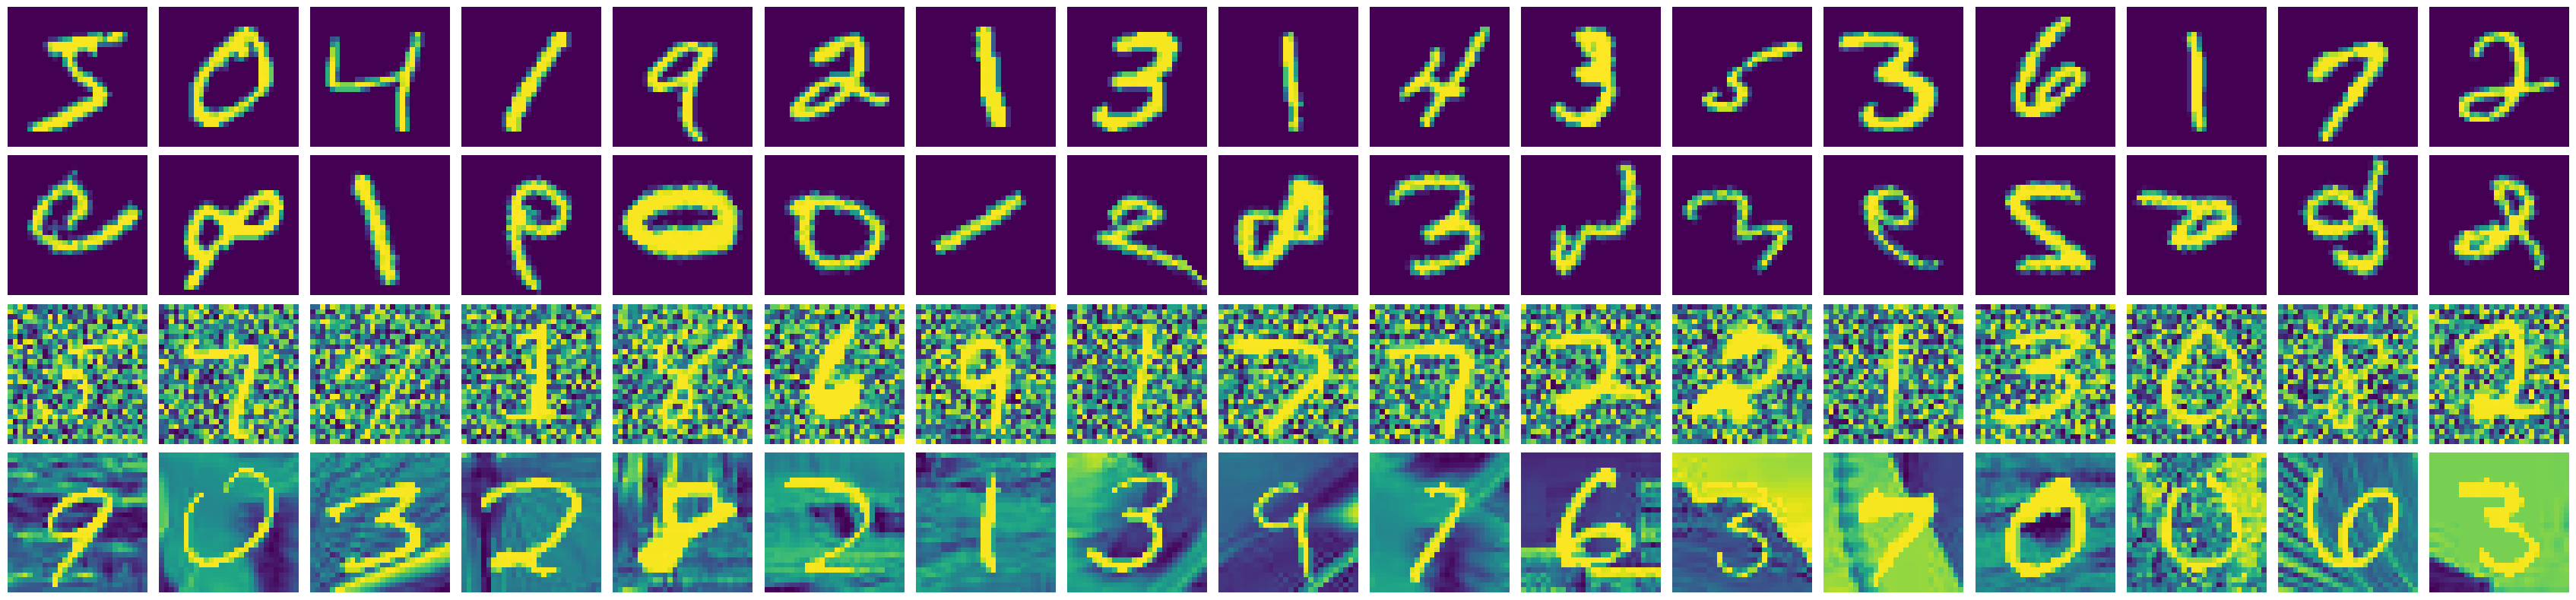

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Placeholder for loading datasets (replace with actual load_dataset function)
# For demonstration, assume each dataset is loaded as X (images) and y (labels)
datasets = {
    "mnist_basic": load_dataset("mnist_basic"),
    "mnist_rotated": load_dataset("mnist_rotated"),    
    "mnist_background_random": load_dataset("mnist_background_random"),    
    "mnist_background_images": load_dataset("mnist_background_images")
}

# Number of samples to display per dataset
n_samples = 17

# Create a figure for the tiled display (5 datasets x 5 samples)
fig, axes = plt.subplots(4, n_samples, figsize=(n_samples * 2, 4 * 2))

# Iterate through each dataset
for row_idx, (dataset_name, (X, y)) in enumerate(datasets.items()):
    # Select first n_samples images and labels
    sample_images = X[:n_samples]
    sample_labels = y[:n_samples]
    
    # Plot each sample
    for col_idx in range(n_samples):
        ax = axes[row_idx, col_idx]
        # Assuming X is a NumPy array with shape (n_samples, height, width) or (n_samples, height, width, channels)
        image = sample_images[col_idx]
        
        # If image has a channel dimension (e.g., grayscale or RGB), handle it
        if len(image.shape) == 3 and image.shape[-1] == 1:
            image = image.squeeze()  # Remove single channel for grayscale
        elif len(image.shape) == 3:
            image = image  # Keep RGB if applicable (e.g., for rectangles_images)
        else:
            image = image  # Already 2D
            
        # Display image
        ax.imshow(image.reshape((28,28)), cmap='gray' if len(image.shape) == 2 else None)
        ax.axis('off')
    
    # Add dataset name as ylabel
    axes[row_idx, 0].set_ylabel(dataset_name, rotation=0, labelpad=100, fontsize=10)

plt.tight_layout()
plt.savefig('tiled_samples.png', dpi=300, bbox_inches='tight')
plt.show()